20200119

4章　ニューラルネットワークの学習

学習 = 訓練データから最適な重みパラメータの値を自動で獲得する

# データから学習する

end-to-end deep learning

<img src="./fig/20161221123712.png">

# 損失関数

ある「ひとつの指標」を基準に、最適なパラメータの探索を行う

損失関数→ニューラルネットワークの性能の「悪さ」を示す 

## 1. 二乗和誤差

<img src="./fig/matplotlibrc.jpg">

- one-hot表現:正解ラベルを1、それ以外は0と表す表記法

In [7]:
def sum_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

## 交差エントロピー誤差

𝐸=−∑𝑘𝑞(𝑘)𝑙𝑜𝑔(𝑝(𝑘))

正解ラベルが1に対応する出力の自然対数を計算する

<img src="./fig/log.png">

In [8]:
import numpy as np

In [12]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

## ミニバッチ学習

機械学習の問題　＝　訓練データに対する損失関数をもとめて、その値をできるだけ小さくするようなパラメータを探し出す

全データに関しての、損失関数の総和を計算する

<img src="./fig/スクリーンショット 2020-01-19 17.44.32.png">

mnistデータでやってみる

one_hot_label = Trueで

In [14]:
import sys, os
sys.path.append(os.pardir) # 親ディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist

In [15]:
# 最初の呼び出しは時間かかる
(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

In [17]:
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


### 訓練データからランダムに10枚抜き出す

In [19]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [20]:
batch_mask

array([33497,  3402, 17430, 28103,  6025, 19955, 20162, 53122, 11414,
       40529])

バッチ対応版の交差エントロピー誤差

In [21]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, t.size)
        
    battch_size = y.reshape[0]
    return  -np.sum(t * np.log(y + 1e-7)) / batch_size

## なぜ損失関数を設定するのか？

ひとつの重みのパラメータの損失関数にい対する微分  
→　「その重みパラメータの値を少しだけ変化させたときに、損失関数がどのように変化するか」

認識精度を指標にしてはいけない理由：  
微分がほとんどの場所で0になってしまい、パラメータの更新ができないため

**傾きが0にはならない**、が大事

# 勾配法：数値微分

真の微分と数値微分

<img src="./fig/真の微分と数値微分の値は異なる2.jpg">

## 数値微分の例

In [22]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

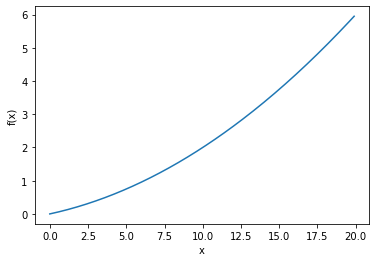

In [26]:
# plot
import matplotlib.pylab as plot

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plot.plot(x, y)
plot.show()

数値微分

In [29]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

0.1999999999990898


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

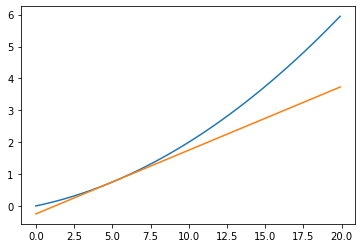

In [30]:
def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

## 偏微分

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 勾配

すべての変数の偏微分をベクトルとしてまとめたもの

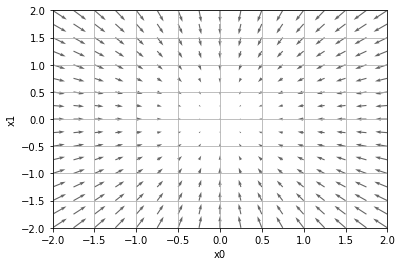

In [32]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y


if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()



↑　勾配が示す方向＝各場所において、関数の値を最も減らす方向!

## 勾配法

勾配方向へ進むことを繰り返すことで、関数の値を徐々に減らす

<img src="./fig/koushinshiki-1024x768.png">

nは学習率  
1回の学習で、どれだけ学習すべきか、どれだけパラメータを更新するか、を決める  
学習率は人間が、変更しながら

In [34]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x

例

In [35]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [36]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

↑の求めていく様子

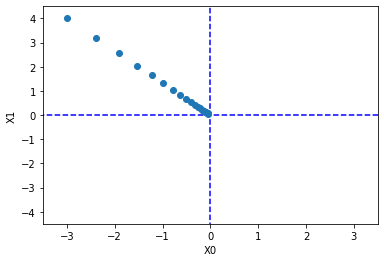

In [38]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

**ハイパーパラメータ**  
学習率などのパラメータ。人の手で決めるパラメータ。

## ニューラルネットワークにおける勾配

In [41]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [39]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [42]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.0846189   0.14406881 -0.22868771]
 [ 0.12692834  0.21610322 -0.34303157]]


重みとその勾配の形状は同じ！

# 学習アルゴリズムの実装

- 損失関数
- ミニバッチ
- 勾配
- 勾配降下法

確率勾配降下法 = SGD(stochastic gradient descent)

## 2層ニューラルネットワークのクラス

/Users/yamada/machine-learning/deep-learning-from-scratch/ch04/two_layer_net.py

In [44]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [45]:
net = TwoLayerNet(input_size=784, hidden_size=1000, output_size=10)

In [46]:
net.params['W1'].shape

(784, 1000)

In [47]:
net.params['b1'].shape

(1000,)

In [48]:
net.params['W2'].shape

(1000, 10)

In [49]:
net.params['b2'].shape

(10,)

## ミニバッチ学習の実装

勾配法によりパラメータを更新する

train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.77175, 0.7789
train acc, test acc | 0.8782166666666666, 0.8813
train acc, test acc | 0.8987833333333334, 0.9016
train acc, test acc | 0.9079, 0.912
train acc, test acc | 0.9143333333333333, 0.9171
train acc, test acc | 0.9201333333333334, 0.9214
train acc, test acc | 0.9237333333333333, 0.9255
train acc, test acc | 0.9266166666666666, 0.9294
train acc, test acc | 0.9300166666666667, 0.9315
train acc, test acc | 0.9332, 0.9337
train acc, test acc | 0.9360666666666667, 0.936
train acc, test acc | 0.9383833333333333, 0.9381
train acc, test acc | 0.9405333333333333, 0.9402
train acc, test acc | 0.9427333333333333, 0.9422
train acc, test acc | 0.94425, 0.9431
train acc, test acc | 0.9459333333333333, 0.9455


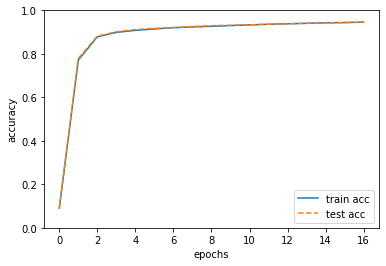

In [51]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### テストデータで評価

汎化性能 はんかせいのう